## Face and Facial Keypoint detection

After you've trained a neural network to detect facial keypoints, you can then apply this network to *any* image that includes faces. The neural network expects a Tensor of a certain size as input and, so, to detect any face, you'll first have to do some pre-processing.

1. Detect all the faces in an image using a face detector (we'll be using a Haar Cascade detector in this notebook).
2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects. This step will be similar to the `data_transform` you created and applied in Notebook 2, whose job was tp rescale, normalize, and turn any image into a Tensor to be accepted as input to your CNN.
3. Use your trained model to detect facial keypoints on the image.

---

In the next python cell we load in required libraries for this section of the project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


#### Select an image 

Select an image to perform facial keypoint detection on; you can select any image of faces in the `images/` directory.

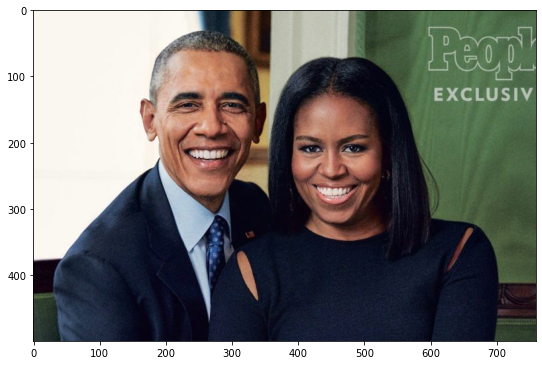

In [2]:
import cv2
# load in color image for face detection
image = cv2.imread('images/obamas.jpg')

# switch red and blue color channels 
# --> by default OpenCV assumes BLUE comes first, not RED as in many images
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

## Detect all faces in an image

Next, you'll use one of OpenCV's pre-trained Haar Cascade classifiers, all of which can be found in the `detector_architectures/` directory, to find any faces in your selected image.

In the code below, we loop over each face in the original image and draw a red square on each face (in a copy of the original image, so as not to modify the original). You can even [add eye detections](https://docs.opencv.org/3.4.1/d7/d8b/tutorial_py_face_detection.html) as an *optional* exercise in using Haar detectors.

An example of face detection on a variety of images is shown below.

<img src='images/haar_cascade_ex.png' width=80% height=80%/>


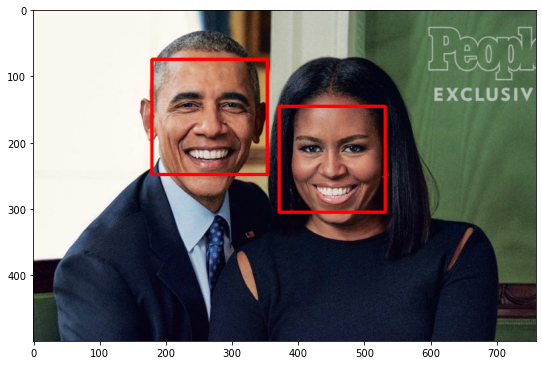

In [3]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.2, 2)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(9,9))

plt.imshow(image_with_detections)

## Loading in a trained model

Once you have an image to work with (and, again, you can select any image of faces in the `images/` directory), the next step is to pre-process that image and feed it into your CNN facial keypoint detector.

First, load your best model by its filename.

In [4]:
import torch
from models import Net

net = Net().double()

## TODO: load the best saved model parameters (by your path name)
## You'll need to un-comment the line below and add the correct name for *your* saved model
net.load_state_dict(torch.load('keypoints_model_drop.pt'))

## print out your net and prepare it for testing (uncomment the line below)
net.eval()

RuntimeError: Error(s) in loading state_dict for Net:
	Unexpected key(s) in state_dict: "fc2.weight", "fc2.bias". 

## Keypoint detection

Now, we'll loop over each detected face in an image (again!) only this time, you'll transform those faces in Tensors that your CNN can accept as input images.

### TODO: Transform each detected face into an input Tensor

You'll need to perform the following steps for each detected face:
1. Convert the face from RGB to grayscale
2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
4. Reshape the numpy image into a torch image.

You may find it useful to consult to transformation code in `data_load.py` to help you perform these processing steps.


### TODO: Detect and display the predicted keypoints

After each face has been appropriately converted into an input Tensor for your network to see as input, you'll wrap that Tensor in a Variable() and can apply your `net` to each face. The ouput should be the predicted the facial keypoints. These keypoints will need to be "un-normalized" for display, and you may find it helpful to write a helper function like `show_keypoints`. You should end up with an image like the following with facial keypoints that closely match the facial features on each individual face:

<img src='images/michelle_detected.png' width=30% height=30%/>




torch.Size([1, 244, 244])
tensor([[-4.9025, -4.8973, -4.9113, -4.9051, -4.9138, -4.9087, -4.9118, -4.9268,
         -4.8941, -4.9127, -4.9178, -4.9043, -4.9131, -4.9150, -4.9227, -4.9203,
         -4.9063, -4.9094, -4.9136, -4.9192, -4.9276, -4.8951, -4.9089, -4.9180,
         -4.9104, -4.9054, -4.9148, -4.9028, -4.9055, -4.9152, -4.9046, -4.8994,
         -4.9109, -4.9062, -4.9113, -4.9241, -4.9178, -4.9153, -4.9085, -4.9262,
         -4.9017, -4.9169, -4.9097, -4.9161, -4.9096, -4.9040, -4.9139, -4.9241,
         -4.9090, -4.9258, -4.9132, -4.9166, -4.9240, -4.9126, -4.9133, -4.9210,
         -4.9085, -4.9050, -4.9173, -4.9102, -4.9118, -4.9117, -4.9049, -4.9291,
         -4.9028, -4.9218, -4.9091, -4.9234, -4.9225, -4.8990, -4.9299, -4.9246,
         -4.9108, -4.9246, -4.8975, -4.9132, -4.9261, -4.9051, -4.9198, -4.9192,
         -4.9199, -4.9055, -4.9105, -4.9014, -4.9113, -4.9088, -4.9138, -4.9204,
         -4.9149, -4.9194, -4.9162, -4.9198, -4.8916, -4.9224, -4.9177, -4.9125,
  

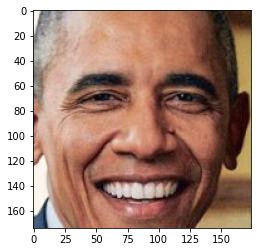

In [5]:
from torchvision import transforms, utils
from data_load import FacialKeypointsDataset
from data_load import Rescale, RandomCrop, Normalize, ToTensor

image_copy = np.copy(image)
# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:
    
    # Select the region of interest that is the face in the image 
    roi = image_copy[y:y+h, x:x+w]
    plt.imshow(roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    roi = roi/255.0
    
    roi = cv2.resize(roi, (244,244))
    
    if(len(roi.shape) == 2):
        roi = roi.reshape(roi.shape[0], roi.shape[1], 1)
    roi = roi.transpose((2, 0, 1))
    roi = torch.from_numpy(roi)
    print(roi.shape)
    output_pts = net(roi[None, ...])
    print(output_pts)
    ## TODO: Convert the face region from RGB to grayscale

    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    
    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    ## perform a forward pass to get the predicted facial keypoints

    ## TODO: Display each detected face and the corresponding keypoints        



[[-144.95256303 -144.75297922]
 [-145.6132114  -145.32435387]
 [-145.7054258  -145.51127675]
 [-145.91858938 -146.36176583]
 [-144.65585111 -145.37538433]
 [-145.99608975 -145.38930251]
 [-145.59694927 -145.73970127]
 [-146.12640636 -146.14502523]
 [-145.21110333 -145.21084909]
 [-145.8173149  -146.0767879 ]
 [-146.24254116 -144.53643347]
 [-145.48873923 -146.14181242]
 [-145.45408492 -145.52146151]
 [-145.74008193 -145.10986805]
 [-145.31172517 -145.64269834]
 [-145.49213808 -144.75896944]
 [-145.48474057 -145.447088  ]
 [-145.44466651 -146.2888962 ]
 [-146.1815818  -145.89099634]
 [-145.58407679 -146.29087995]
 [-145.29150256 -145.94924314]
 [-145.37449153 -145.97082329]
 [-145.49797402 -145.38870377]
 [-145.66378595 -146.19595938]
 [-145.22761556 -146.07763454]
 [-145.5073052  -145.81827565]
 [-146.41242015 -145.66687896]
 [-145.27290431 -146.12737152]
 [-145.45065014 -145.29450003]
 [-145.86850285 -145.6353269 ]
 [-145.45793058 -145.45441928]
 [-145.28734457 -146.56437444]
 [-144.7

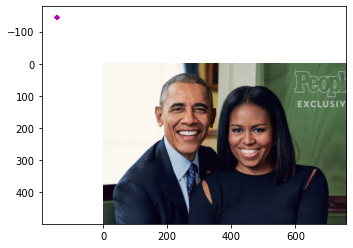

In [6]:
predicted_key_pts = output_pts.data

predicted_key_pts = predicted_key_pts.numpy()

# undo normalization of keypoints  
predicted_key_pts = (predicted_key_pts*50.0)+100

# plot ground truth points for comparison, if they exist

predicted_key_pts = predicted_key_pts.astype('float').reshape(-1, 2)
print(predicted_key_pts)
plt.imshow(image, cmap='gray')
plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')